## 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화
* 데이터셋 출처 : 
    * [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)

<img src="https://i.imgur.com/b6wcQ7f.png" width="500">


* scikit-learn 1.0 이상의 버전을 사용해 주세요!
* 1.0 이하의 버전이라면 conda prompt 혹은 터미널을 열어 아래 명령어로 업그레이드 해주세요!
* conda : conda update scikit-learn
* pip install scikit-learn --upgrade


* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img src="https://i.imgur.com/rKOYbeX.png">



In [ ]:
# 실습에서 wordcloud 를 사용하기 때문에 설치되어 있지 않다면 설치를 해주세요!
# 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud
# !pip install koreanize_matplotlib

## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 한글 폰트 확인

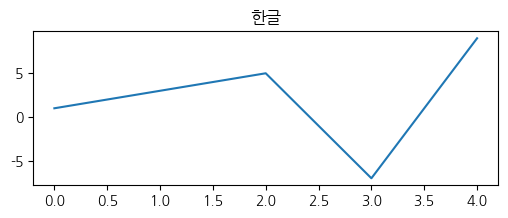

In [7]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글", figsize=(6, 2));

## 데이터 로드

In [10]:
# 학습, 예측 데이터셋을 불러오고 shape 로 행과 열의 크기를 출력합니다.
# 
# 
train = pd.read_csv("data/klue/train_data.csv")
test = pd.read_csv("data/klue/test_data.csv")
train.shape, test.shape

((45654, 3), (9131, 2))

In [12]:
# 토픽을 불러옵니다.
topic = pd.read_csv("data/klue/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [15]:
# head 로 train의 상위 5개 데이터를 가져옵니다.
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [16]:
# head 로 test의 상위 5개 데이터를 가져옵니다.
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [18]:
# 토픽에 어떤 값이 있는지 values로 봅니다. 
train["topic_idx"].values

array([4, 4, 4, ..., 1, 2, 2])

In [19]:
topic.values

array([['IT과학', 0],
       ['경제', 1],
       ['사회', 2],
       ['생활문화', 3],
       ['세계', 4],
       ['스포츠', 5],
       ['정치', 6]], dtype=object)

## 전처리를 위한 데이터 병합
* 학습, 예측 세트를 똑같이 전처리 해주기 위해 각각 같은 방법을 적용해 줄 수도 있지만
* 두 데이터를 병합해서 전처리를 해주고 다시 나눠주겠습니다.

## concat
<img src="https://pandas.pydata.org/docs/_images/08_concat_row.svg" width="500">

In [20]:
# 전처리를 위해 concat으로 데이터 병합
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [21]:
# head
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [22]:
# tail
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


## merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>

* 실제 토픽명을 볼 수 있도록 topic_idx 를 키값으로 merge 합니다.

In [26]:
# raw 를 topic 데이터와 merge 합니다.
df = raw.merge(topic, how="left")
df.shape

(54785, 4)

In [27]:
# merge 가 잘 되었는지 head 로 확인
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [28]:
df.tail()

,index,title,topic_idx,topic
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN


## 정답값 빈도수
* train 에서 제공하는 정답값의 빈도수

In [29]:
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않습니다.
# topic_idx 의 빈도수를 구합니다.
df["topic_idx"].value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [30]:
train["topic_idx"].value_counts()

topic_idx
4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
Name: count, dtype: int64

In [31]:
# topic 의 빈도수를 구합니다.
df["topic"].value_counts()

topic
세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: count, dtype: int64

In [35]:
df["topic"].value_counts(normalize=True)

topic
세계      0.167105
사회      0.161256
스포츠     0.151860
정치      0.147873
경제      0.136286
생활문화    0.129956
IT과학    0.105664
Name: proportion, dtype: float64

In [34]:
df["topic"].value_counts().index

Index(['세계', '사회', '스포츠', '정치', '경제', '생활문화', 'IT과학'], dtype='object', name='topic')

<Axes: xlabel='topic', ylabel='count'>

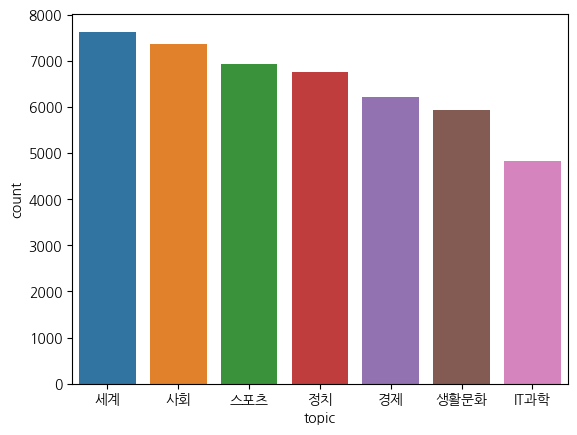

In [33]:
# df 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않습니다. 
sns.countplot(data=df, x="topic", order=df["topic"].value_counts().index)

## 문자 길이

In [42]:
# 문자, 단어 빈도수 파생변수 만들기
# len, word_count, unique_word_count
# df["title"].str.len()
df["len"] = df["title"].map(lambda x : len(x))
df["word_count"] = df["title"].map(lambda x : len(x.split()))
df["unique_word_count"] = df["title"].map(lambda x : len(np.unique(x.split())))

In [43]:
# 파생변수가 잘 만들어졌는지 확인하기
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


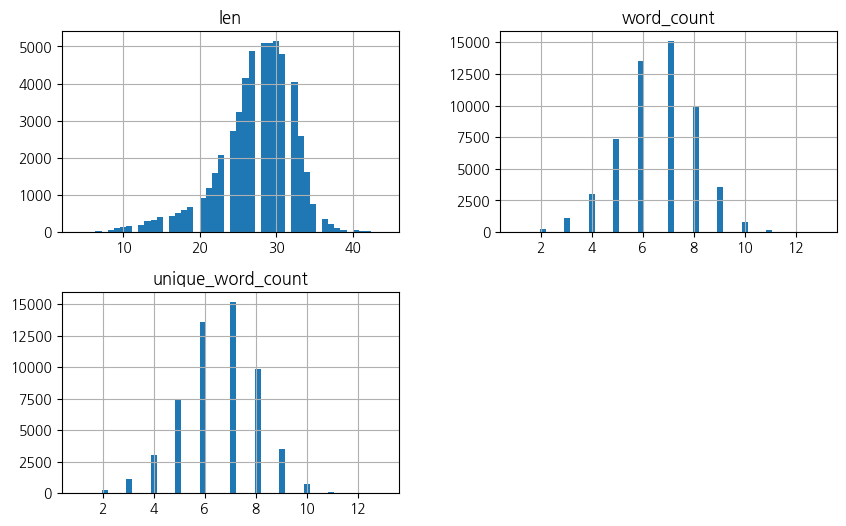

In [49]:
# 서브플롯을 통해  "len", "word_count", "unique_word_count"의 histplot 을 시각화 합니다.
df.iloc[:, -3:].hist(bins=50, figsize=(10, 6));

In [64]:
df.loc[df["topic_idx"].notnull(), "traintest"] = "train"
df.loc[~df["topic_idx"].notnull(), "traintest"] = "test"
df

,index,title,topic_idx,topic,len,word_count,unique_word_count,traintest
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5,train
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6,train
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8,train
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7,train
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7,train
...,...,...,...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28,6,6,test
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7,test
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28,9,9,test
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6,test


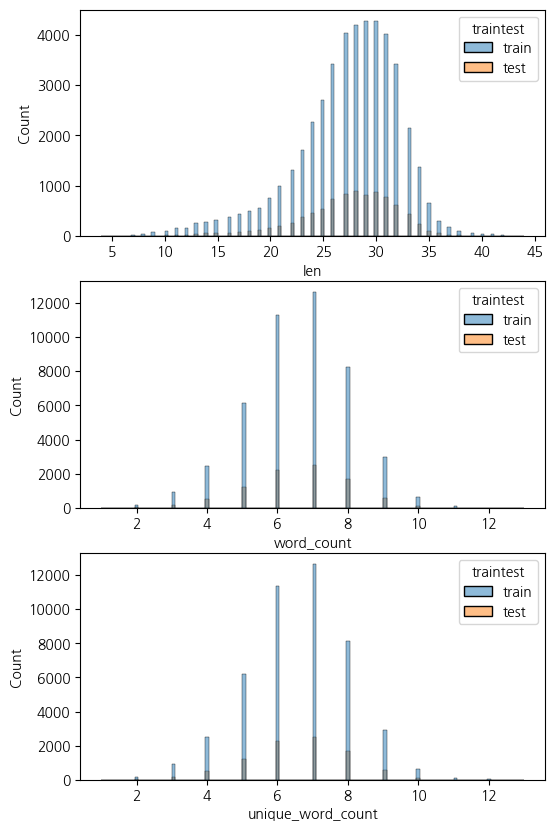

In [66]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))
sns.histplot(data=df, x="len", hue="traintest", ax=axes[0])
sns.histplot(data=df, x="word_count", hue="traintest", ax=axes[1])
sns.histplot(data=df, x="unique_word_count", hue="traintest", ax=axes[2]);

In [68]:
# "len", "word_count", "unique_word_count" 의 기술통계 값을 구합니다.
df[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


<Axes: >

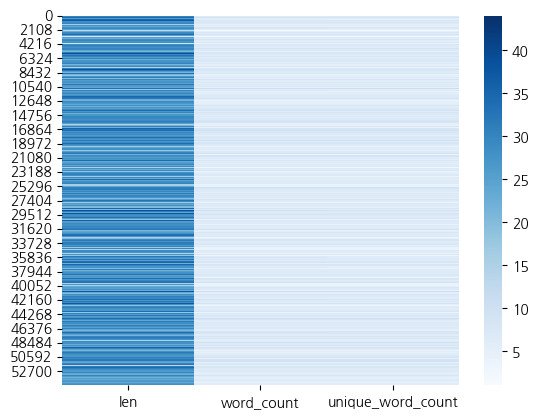

In [72]:
# heatmap 을 통한 "len", "word_count", "unique_word_count" 시각화
sns.heatmap(df[["len", "word_count", "unique_word_count"]], cmap="Blues")

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">
https://seaborn.pydata.org/tutorial.html

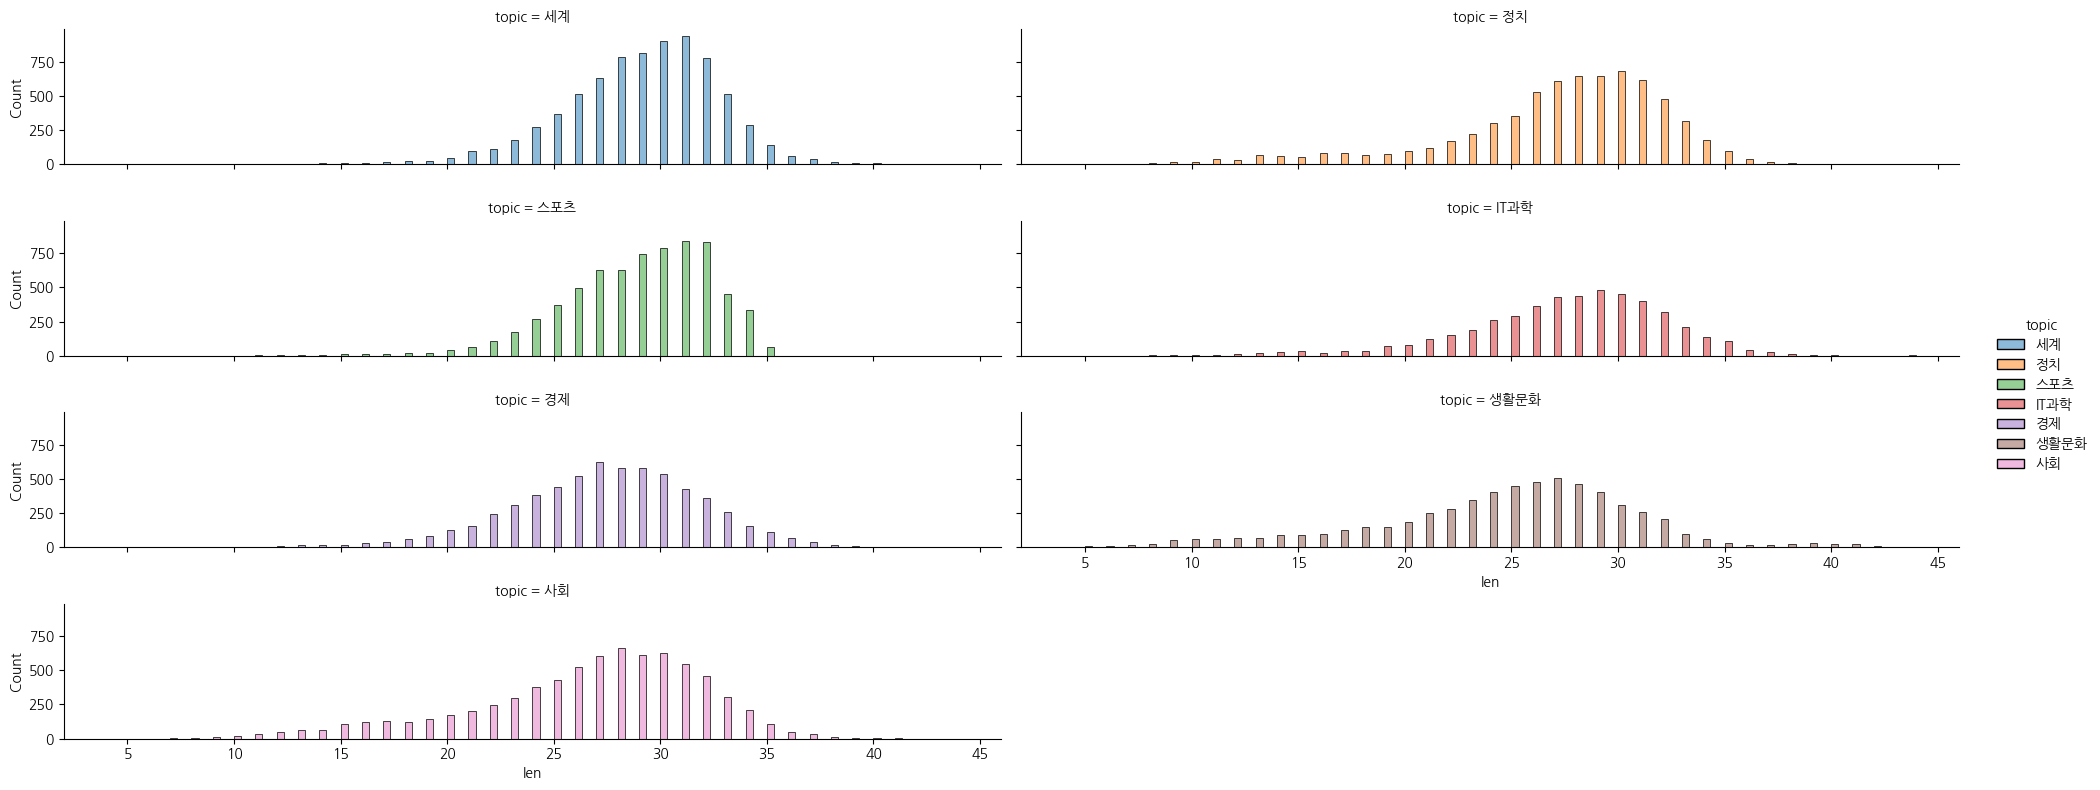

In [77]:
# 문장길이
# displot 으로 topic 별 "len" 의 histplot 시각화 하기
# data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2
sns.displot(data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

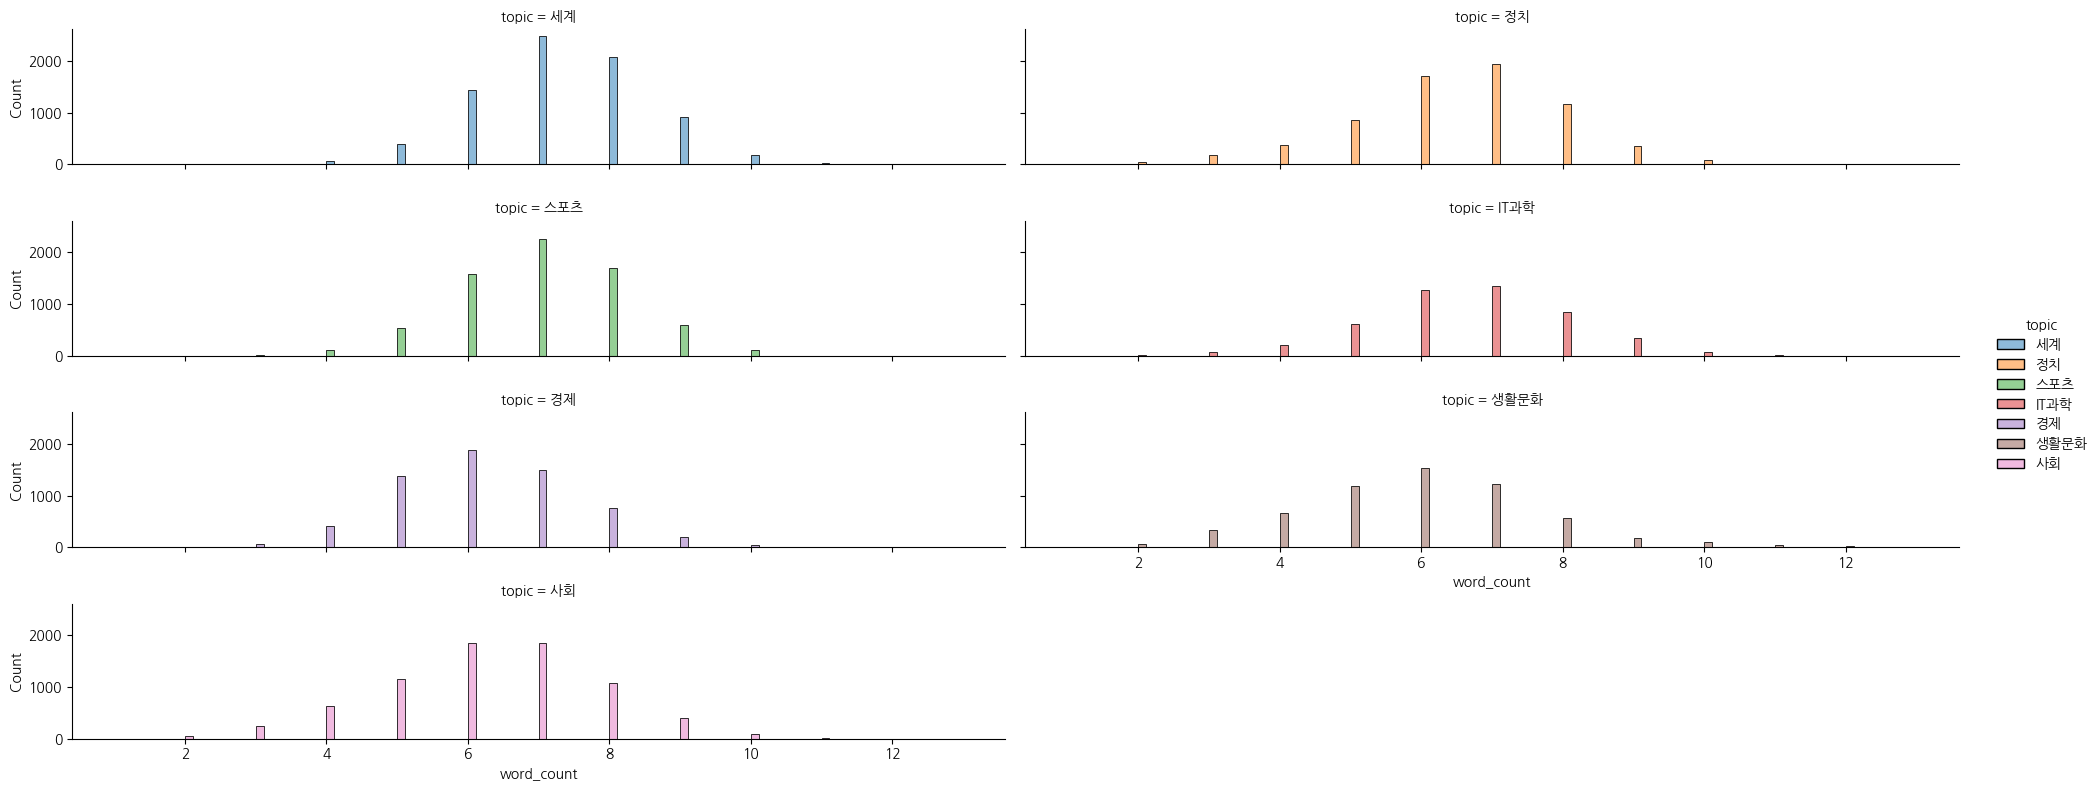

In [78]:
# 단어 수
# displot 으로 topic 별 "word_count" 의 histplot 시각화 하기

sns.displot(data=df, x="word_count", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

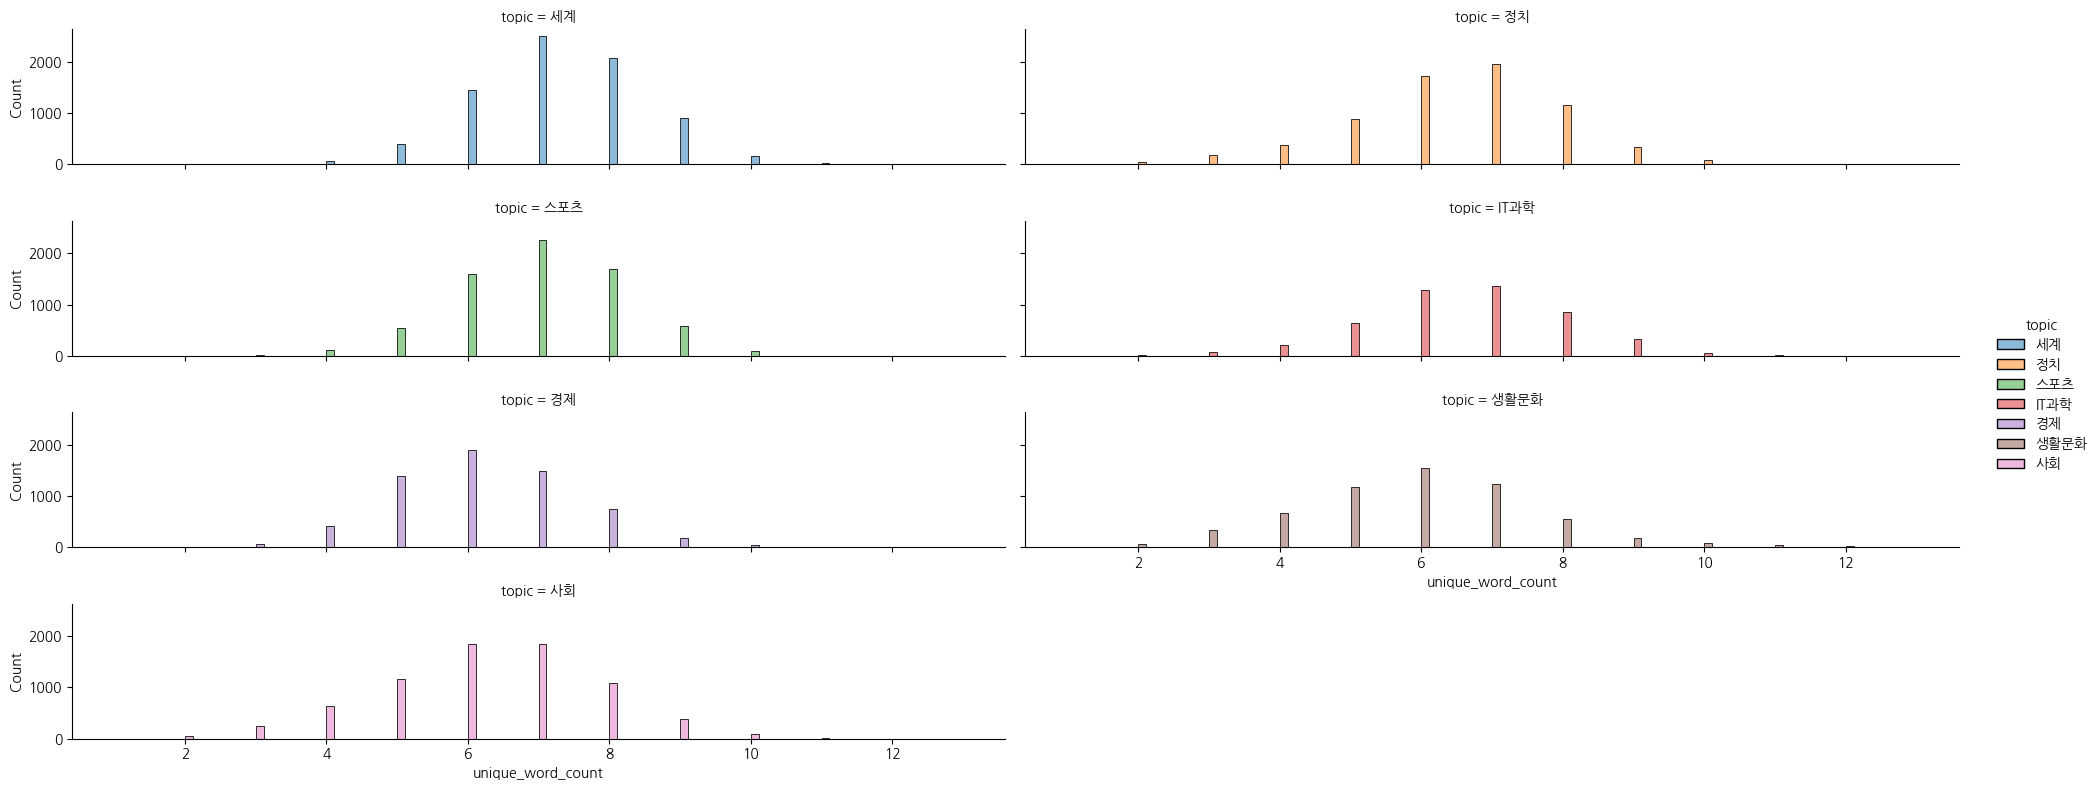

In [79]:
# 중복 제거 단어 수
# displot 으로 topic 별 "unique_word_count" 의 histplot 시각화 하기

sns.displot(data=df, x="unique_word_count", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

## 문자 전처리
### 숫자 제거

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


In [84]:
# 정규표현식으로 숫자제거
df["title_num"] = df["title"].map(lambda x : re.sub("[0-9]", "", x))

In [87]:
# 판다스의 str.replace 기능을 통해 제거
df["title_num"] = df["title"].str.replace("[0-9]", "", regex=True)

### 특수 문자 제거

In [88]:
# 특수 문자 제거 시 구두점 참고
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
# 특수 문자 사용시 정규표현식에서 메타 문자로 특별한 의미를 갖기 때문에 역슬래시를 통해 예외처리를 해주어야 합니다.
df["title"].str.replace("\.", "")

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780        인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782        40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 영문자는 모두 소문자로 변경
* 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문

In [97]:
# CountVectorizer, TfidfVectorizer 를 사용하게 되면 기본값이 소문자라 별도 처리는 하지 않아도 됨
df["title"].str.lower()

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780        인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782        40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 한글, 영문과 공백만 남기고 모두 제거

In [104]:
# 정규표현식 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] 을 사용하면 한글과 공백만 남기고 제거하게 됩니다.
df["title_han"] = df["title"].str.replace("[^ㄱ-하-ㅣ가-힣]"," ", regex=True)
df["title_han"].head()

0            인천 핀란드 항공기 결항 휴가철 여행객 분통
1      실리콘밸리 넘어서겠다 구글   조원 들여 美전역 거점화
2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합
4           시진핑 트럼프에 중미 무역협상 조속 타결 희망
Name: title_han, dtype: object

### 공백 여러 개는 하나로

In [110]:
# 공백 여러 개 전처리 예시
re.sub("[ ]+", " ", "공백             전처리")

'공백 전처리'

In [112]:
# 여러 개의 공백([ ]+)을 하나의 공백으로 치환해 줍니다.
df["title_han"].str.replace("[ ]+", " ", regex=True)

0               인천 핀란드 항공기 결항 휴가철 여행객 분통
1           실리콘밸리 넘어서겠다 구글 조원 들여 美전역 거점화
2         이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3           클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합
4              시진핑 트럼프에 중미 무역협상 조속 타결 희망
                      ...               
54780               인천 오후 시 분 대설주의보 눈 쌓여
54781      노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782          년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783        게시판 아리랑 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심 지원책 강구
Name: title_han, Length: 54785, dtype: object

### 불용어 제거

In [125]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split()
    stops = ["나는", "너는", "한다", "및", "것"]
    meaningful_words = [w for w in tokens if w not in stops]
    return " ".join(meaningful_words)

In [127]:
remove_stopwords(text="너는 밥 및 국을 먹는다. 것")

'밥 국을 먹는다.'

In [128]:
# map을 사용하여 불용어 제거하기
df["title"].map(remove_stopwords)

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
2            이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780        인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782        40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

## 형태소 분석을 통한 조사, 구두점 제거
* Pecab
    * [Pecab: Pure python Korean morpheme analyzer based on Mecab (https://github.com/hyunwoongko/pecab)
    
* [형태소 분석 및 품사 태깅 — KoNLPy 0.6.0 documentation](https://konlpy.org/ko/v0.6.0/morph/)
* [Korean POS tags comparison chart - Google Sheets](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)

In [154]:
# pecab
from pecab import PeCab

pecab = PeCab()

In [162]:
def remove_josa_puct(corpus_txt):
    pecab_pos = pecab.pos(corpus_txt, drop_space=False)
    pos_after = []
    for txt, pos in pecab_pos:
        if not pos.startswith("J") and pos not in ("SF"):
            pos_after.append(txt)
    return "".join(pos_after)

remove_josa_puct(corpus_txt="나는 밥을 먹는다.")

'나 밥 먹는다'

In [166]:
from tqdm import tqdm
tqdm.pandas()

train["title_remove_pos"] = train["title"].progress_map(remove_josa_puct)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45654/45654 [07:21<00:00, 103.31it/s]


In [168]:
# 시간이 오래 걸리는 전처리 후에는 파일로 저장해 두는 것을 권장합니다. 
train.to_csv("data/klue/train_pos.csv", index=False)
pd.read_csv("data/klue/train_pos.csv")

,index,title,topic_idx,title_remove_pos
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천→핀란드 항공기 결항…휴가철 여행객 분통
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책 미국 경제전쟁 멈추는 것
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프 중미 무역협상 조속 타결 희망
...,...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1,KB금융 미국 IB 스티펠 제휴…선진국 시장 공략
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2,1보 서울시교육청 신종코로나 확산 개학 연기·휴업 검토
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1,게시판 키움증권 2020 키움 영웅전 실전투자대회
45652,45652,답변하는 배기동 국립중앙박물관장,2,답변하는 배기동 국립중앙박물관장


## 워드클라우드

* https://github.com/amueller/word_cloud

* 불용어, 자주 등장하는 단어, 주제별 단어 등을 시각화 하기에 좋습니다.

In [169]:
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud

In [182]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

# !apt -qq -y install fonts-nanum

import platform

# 운영체제에 따른 한글 폰트 경로 설정
if platform.system() == 'Windows':
    # Windows 운영체제의 경우
    font_path = r'C:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    # macOS의 경우
    font_path = r'/Library/Fonts/AppleGothic.ttf'
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
else:
    # Linux 또는 기타 운영체제의 경우 (예: 'NanumBarunGothic')
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    
from wordcloud import WordCloud

stopwords = ["보", "일", "첫", "월", "년", "등"]

def display_word_cloud(data, stopwords=stopwords, width=1200, height=500):
    word_cloud = WordCloud(font_path=font_path,
                           width=width,
                           height=height,
                           stopwords=stopwords,
                           background_color="white",
                           random_state=42
                         ).generate(data)
    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [180]:
# content 변수에 "내용_전처리"를 list형식으로 담아 줍니다.
# join()을 이용하여 변수 content를 리스트에서 문자열로 변환해 줍니다.
content = " ".join(df["title_han"].tolist())
content[:1000]

'인천 핀란드 항공기 결항 휴가철 여행객 분통 실리콘밸리 넘어서겠다 구글   조원 들여 美전역 거점화 이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것     클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합 시진핑 트럼프에 중미 무역협상 조속 타결 희망 팔레스타인 가자지구서   세 소년 이스라엘군 총격에 사망 인도   년 만에 파키스탄 공습 테러 캠프 폭격종합 보 美대선   토론 음담패설 만회실패 트럼프 사과 대신 빌클린턴 공격해 역효과 푸틴 한반도 상황 진전 위한 방안 김정은 위원장과 논의 특검 면죄부 받은 트럼프 스캔들 보도 언론 맹공 국민의 적 日 오키나와서 열린 강제징용 노동자 추도식 이란서 최고지도자 모욕 혐의 미국인에 징역   년 선고 카니발 축제 보러 가자 브라질 리우에 대형 유람선 행렬 美올랜도 병원 최악 총기 테러 부상자 치료비 안 받는다 日 대기업 올해 평균       임금 인상     엘니뇨 여전히 강력  분기엔 소멸될 듯 이스라엘 네타냐후 유대교도 병역문제로 연정 협상 진통     사우디 이어 美 호르무즈 호위 연합에 참여키로 사우디군 오만해 유조선 공격 예멘반군과 연결 이란 겨냥 개천에서 용 나와라 美사업가 모교에  천억원 장학금 기부    브렉시트 합의 전 해야 할 일 많아 英에 경고 스팍스운용 일본 디플레 벗어나 새로운 도약 준비 중 트럼프 총기난사는 惡의 공격 총기규제 초당적 협력 촉구종합     카지노업체와 스폰서 계약 美프로스포츠 사상 처음 오바마 대통령 퇴임 후 워싱턴  에 사무실 개소 예정 美 전문가 트럼프 정부 북한과 정상급 관계 시도할 것 이스라엘 네타냐후 이란에 경고 우리 전투기 도달가능 지역 이스라엘 네타냐후 총선 한달 앞두고 우크라 방문 예정 트럼프 탄핵보고서 통화기록에 등장한 의문의 숫자   미국 산업생산 한달만에       제조업 회복 기대 셰이크 살만     회장 평양 방문 최휘 국가체육지도위원장    신중국  년  차이나 미라클 최빈국서    경제대국 부상     단교   개월만에 카타르 왕래 화물선

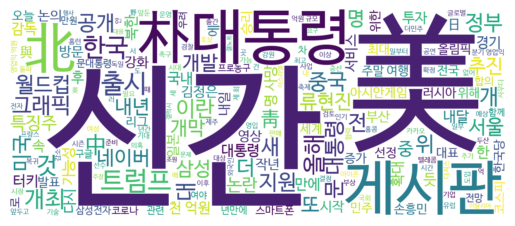

In [183]:
# content를 워드클라우드로 시각화 해봅니다.
display_word_cloud(content)

## 특정 토픽만 워드클라우드 시각화

In [193]:
# topic 의 unique 값만 보기
# df["topic"].unique()
topic["topic"]

0    IT과학
1      경제
2      사회
3    생활문화
4      세계
5     스포츠
6      정치
Name: topic, dtype: object

IT과학


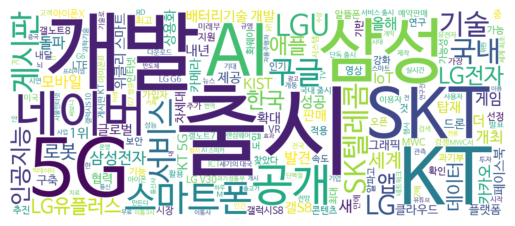

경제


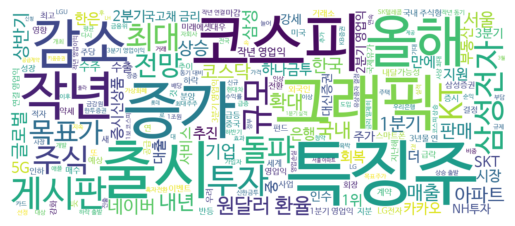

사회


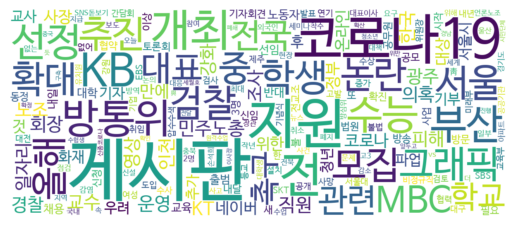

생활문화


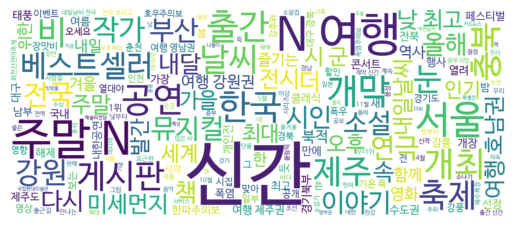

세계


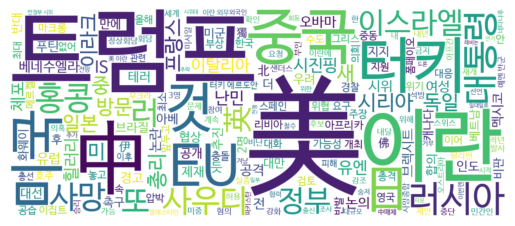

스포츠


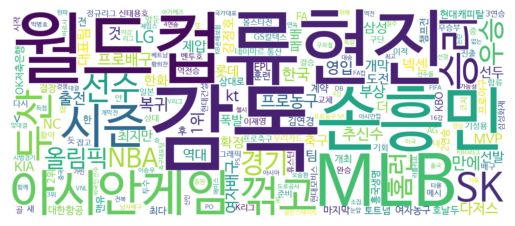

정치


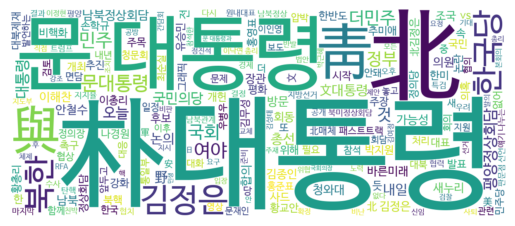

In [198]:
# display_word_cloud 로 시각화
for tp in topic["topic"]:
    print(tp)
    display_word_cloud(" ".join(df.loc[df["topic"] == tp, "title"]))